# Adult Income Prediction Dataset
Census-based dataset for income classification tasks
dataset. The objective is to perform binary classification to predict whether an individual's income exceeds $50,000 per year.

# Load the Required Modules

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk

# modelling lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

# Algorithms
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb


#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

# Load the Dataset

In [51]:
df=pd.read_csv('/kaggle/input/adult-income-prediction-dataset/adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [34]:
# find number of numeric columns 
df.select_dtypes(include=['int64','float64']).columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [11]:
#Find a categorical columns
df.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [3]:
# Find all categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Loop through each and print value counts
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print('-' * 50)



Column: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------

Column: education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
--------------------------------------------------

Column: marital.status
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-

<Axes: >

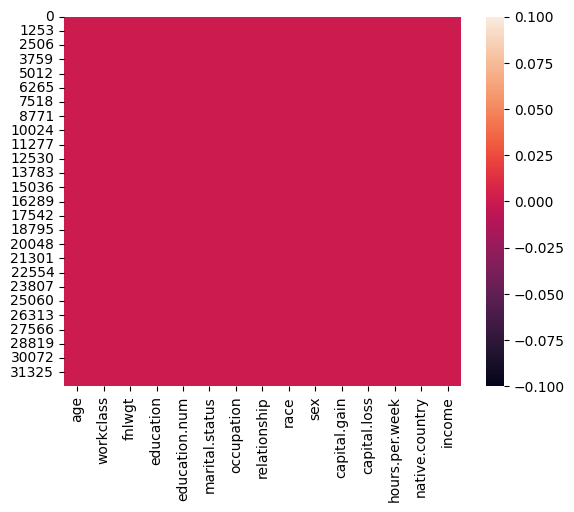

In [7]:
# find a null value
sns.heatmap(df.isnull())

In [3]:
# Check unique values
print("\nUnique values per column:\n", df.nunique())


Unique values per column:
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [ ]:
Data Preprocessing and Cleaning

In [ ]:
# Data Preprocessing and Cleaning

# Clean column names
df.columns = df.columns.str.replace('.', '_', regex=False).str.replace('-', '_', regex=False).str.lower()
print(f"Initial Dataset Shape: {df.shape}")
print("\n**Initial 5 Rows (Head):**")
print(df.head().to_markdown(index=False))
print("\n**Data Types (Info):**")
df.info()

In [53]:
# --- 2. Data Preprocessing and Cleaning ---
print("\n## 2. Data Preprocessing and Cleaning")
# Missing Value Handling: The dataset uses '?' for missing values
cols_to_impute = ['workclass', 'occupation', 'native_country']
print(f"Checking for '?' in: {cols_to_impute}")


# Impute '?' with the Mode (Most Frequent Value)
for col in cols_to_impute:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('?', mode_value)
    print(f"- Imputed missing values in **{col}** with the mode: **{mode_value}**")

# Drop 'fnlwgt' as it is a sampling weight, not a direct individual attribute for this analysis.
df = df.drop('fnlwgt', axis=1)
print(f"\n- Dropped the column 'fnlwgt'. New Dataset Shape: {df.shape}")


## 2. Data Preprocessing and Cleaning
Checking for '?' in: ['workclass', 'occupation', 'native_country']
- Imputed missing values in **workclass** with the mode: **Private**
- Imputed missing values in **occupation** with the mode: **Prof-specialty**
- Imputed missing values in **native_country** with the mode: **United-States**

- Dropped the column 'fnlwgt'. New Dataset Shape: (32561, 14)


# Exploratory Data Analysis (EDA) 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


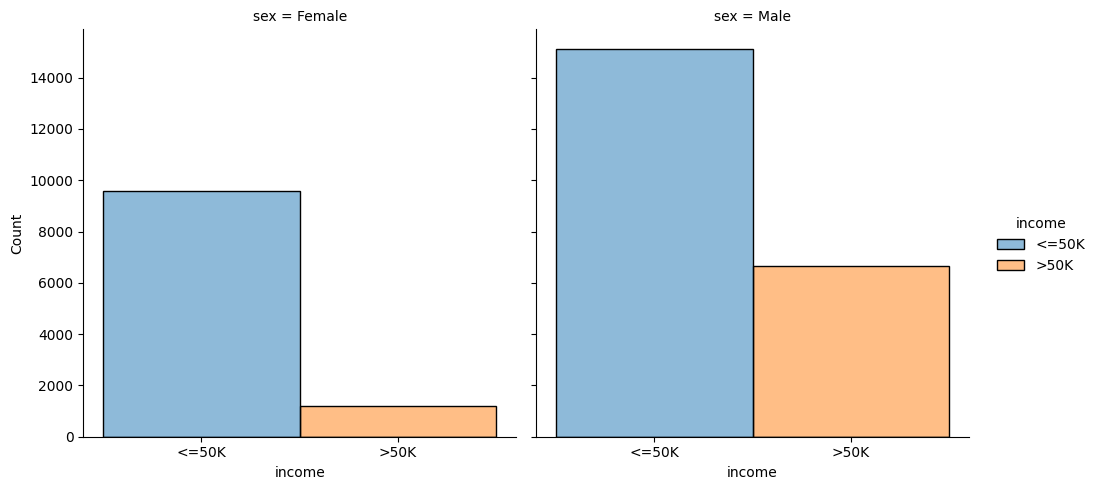

In [11]:
sns.displot(data=df, x="income", col="sex", kde=True, hue="income")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0, 0.5, 'Count')

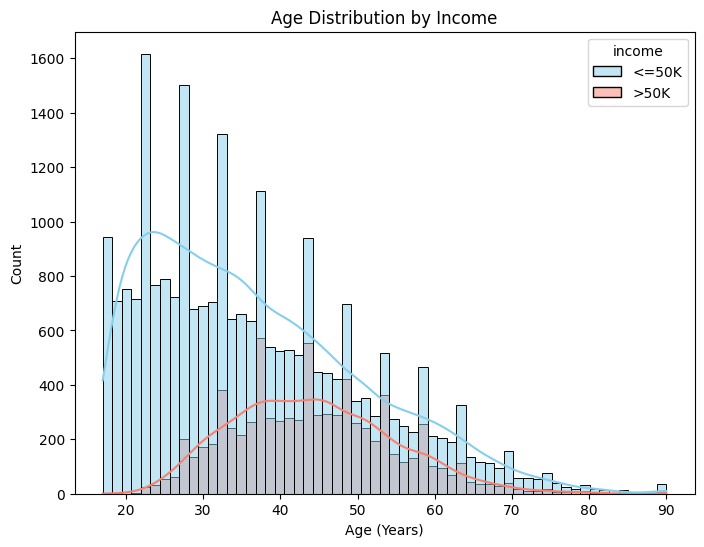

In [15]:
# Plot Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='income', kde=True, palette={'<=50K': 'skyblue', '>50K': 'salmon'})
plt.title('Age Distribution by Income')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
#plt.savefig('age_distribution.png')
#plt.close()

In [14]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


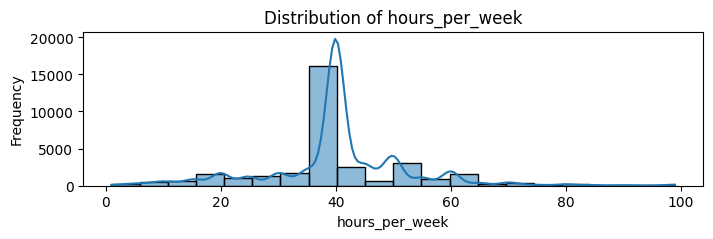

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


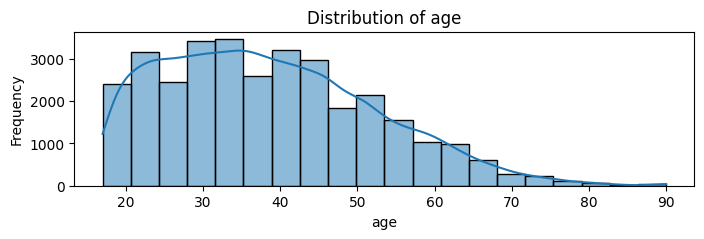

In [18]:
import matplotlib.pyplot as plt
col_dis = ['hours_per_week', 'age']
for col in col_dis:
    plt.figure(figsize=(8, 2))
    sns.histplot(df[col], bins = 20, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show() 


### 3.3 Proportion of High Income ($>50K$) by Education
A clear positive correlation between education and high income is evident.
| education    |     >50K |
|:-------------|---------:|
| Doctorate    | 74.092   |
| Prof-school  | 73.4375  |
| Masters      | 55.6587  |
| Bachelors    | 41.4753  |
| Assoc-voc    | 26.1216  |
| Assoc-acdm   | 24.836   |
| Some-college | 19.0235  |
| HS-grad      | 15.9509  |
| 12th         |  7.62125 |
| 10th         |  6.64523 |



<Figure size 1000x600 with 0 Axes>

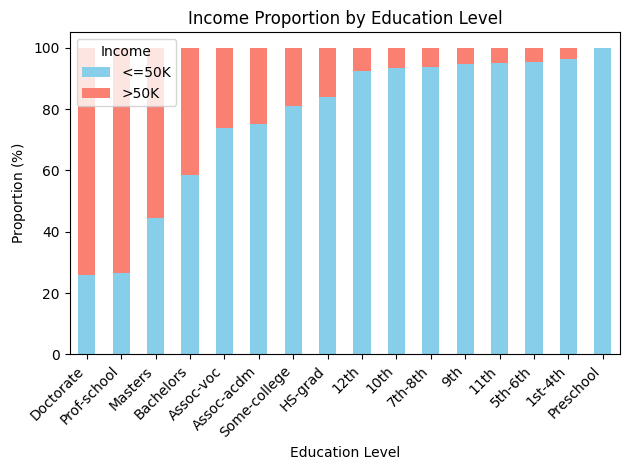

In [19]:
# 3.3 Categorical Feature Analysis (Proportions)

# Education vs Income
education_income_prop = pd.crosstab(df['education'], df['income'], normalize='index').sort_values(by='>50K', ascending=False) * 100

plt.figure(figsize=(10, 6))
education_income_prop.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Income Proportion by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion ($\%$)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.tight_layout()
#plt.savefig('income_by_education.png')
#plt.close()

print("\n### 3.3 Proportion of High Income ($>50K$) by Education")
print("A clear positive correlation between education and high income is evident.")
print(education_income_prop['>50K'].head(10).to_markdown())
print("")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

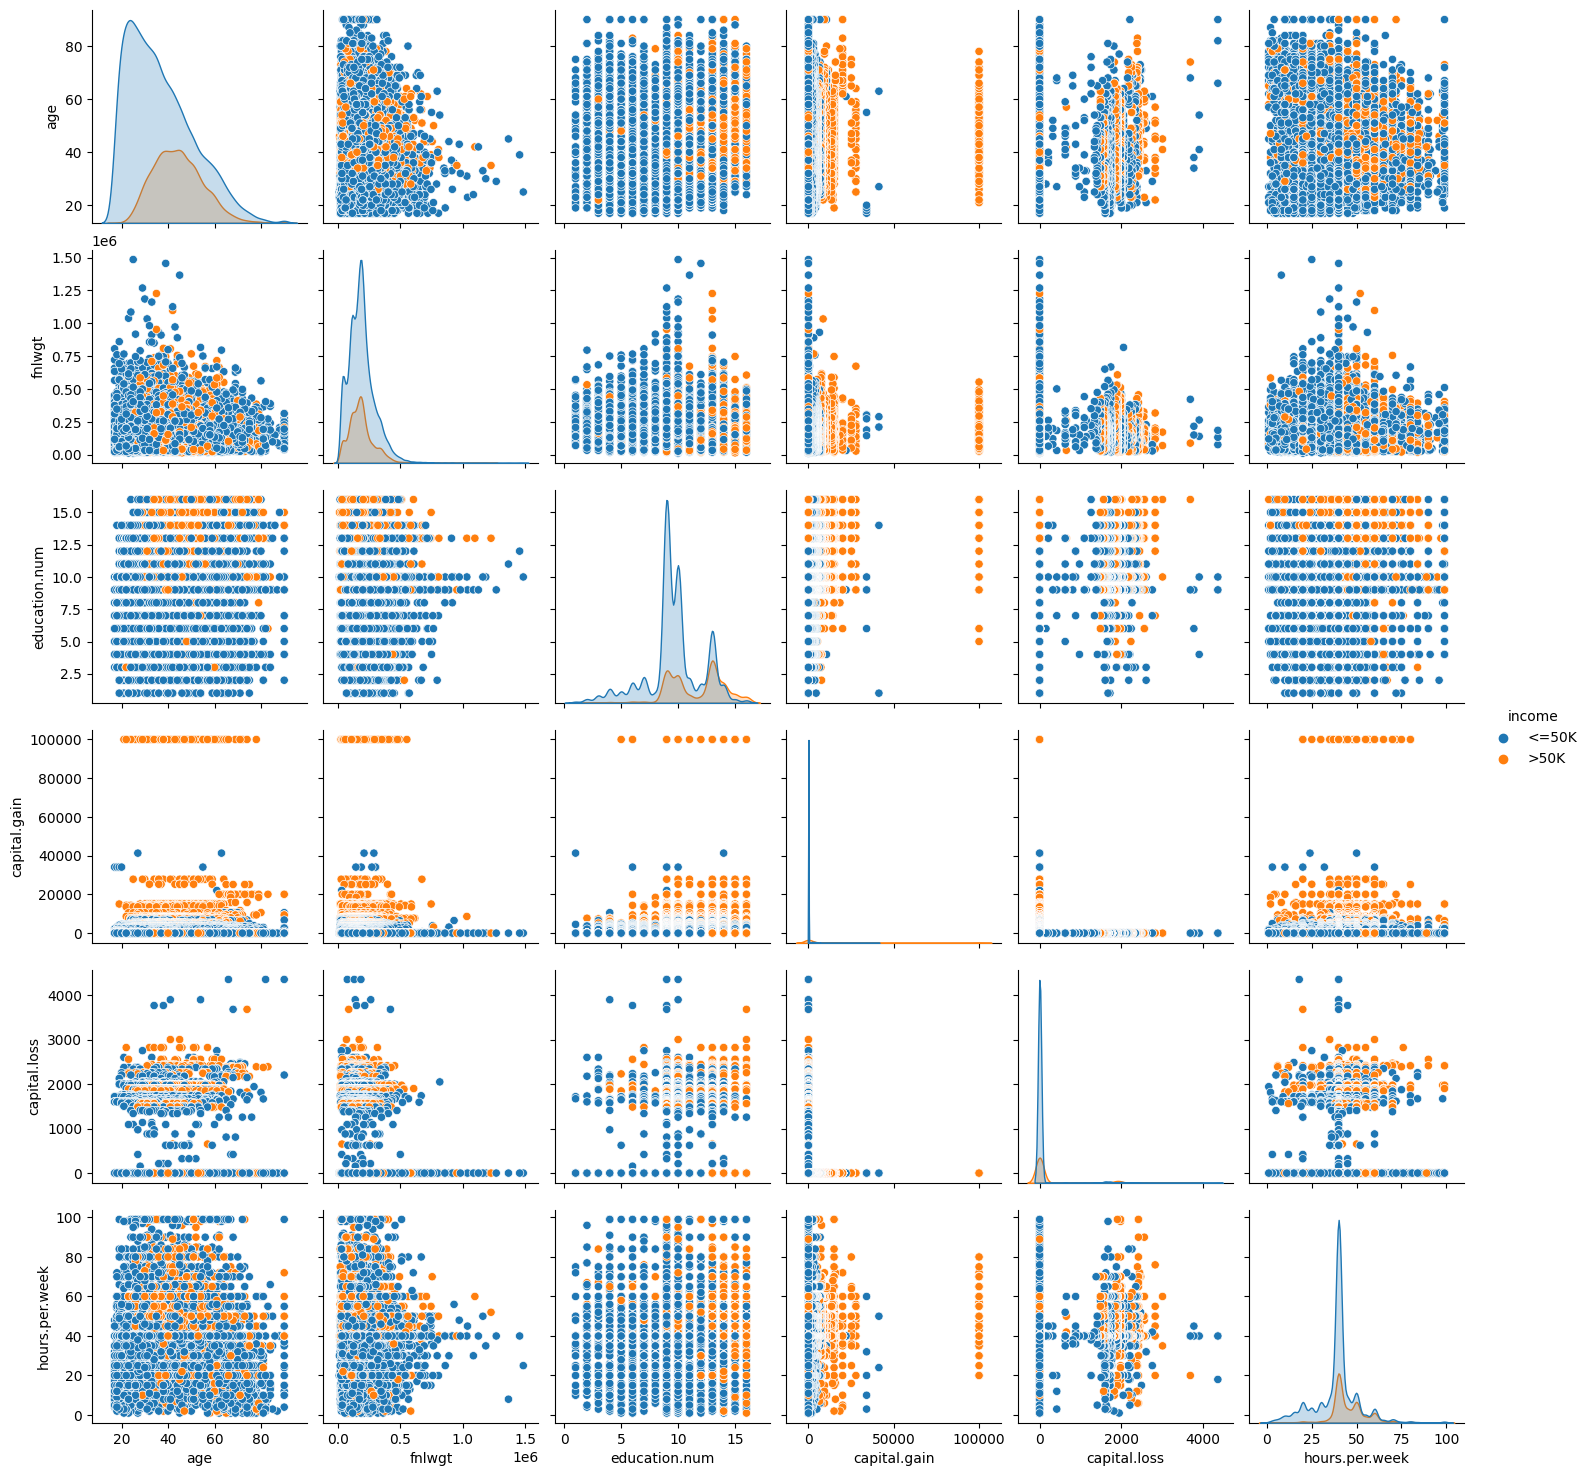

In [6]:

sns.pairplot(data=df, hue="income")

In [ ]:
df.corr()

In [ ]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

# transforming categorical variable to numerica

In [54]:

label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le   # save encoder for future predictions





In [55]:
# ---------------------------
# 2. Split Features & Target
# ---------------------------
X = df.drop('income', axis=1)  # independent variables
y = df['income']               # target variable


In [34]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [56]:
# ---------------------------
# 3. Train / Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26048, 13)
Shape of X_test: (6513, 13)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods# 

In [36]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Train a random forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
0              age    0.217485
9     capital_gain    0.124446
6     relationship    0.121613
11  hours_per_week    0.110538
3    education_num    0.098928
5       occupation    0.084985
4   marital_status    0.067158
1        workclass    0.049452
10    capital_loss    0.041088
2        education    0.035732
12  native_country    0.018517
7             race    0.017949
8              sex    0.012110


In [37]:
#  LogisticRegression
lr = LogisticRegression()
print(lr.fit(X_train ,  y_train))

#  DecisionTreeClassifier()
dt = DecisionTreeClassifier()
print(dt.fit(X_train ,  y_train))


#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=100)
print(rf.fit(X_train ,  y_train))

#SVM
svm = LinearSVC(random_state=100)
print(svm.fit(X_train ,  y_train))

#Naive Bayes
nb = MultinomialNB()
print(nb.fit(X_train ,  y_train))
#KNeighborsClassifier
kn=KNeighborsClassifier()
print(kn.fit(X_train ,  y_train))

# Initialize the XGBoost classifier
xgb = xgb.XGBClassifier(
    n_estimators=100,  # number of trees (adjust as needed)
    max_depth=3,  # maximum depth of each tree (adjust as needed)
    learning_rate=0.1  # learning rate (adjust as needed)
)

# Train the model
xgb.fit(X_train ,  y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier(random_state=100)
LinearSVC(random_state=100)
MultinomialNB()
KNeighborsClassifier()


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_kn = kn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


# campare All model Accuracy

In [39]:
from sklearn import metrics
print('Accuracy of LogisticRegression',metrics.accuracy_score( y_test,y_pred_lr))
print('Accuracy of  DecisionTreeClassifier',metrics.accuracy_score( y_test,y_pred_dt))
print('Accuracy of RandomForestClassifier',metrics.accuracy_score( y_test,y_pred_rf))
print('Accuracy of LinearSVC',metrics.accuracy_score( y_test,y_pred_svm))
print('Accuracy of MultinomialNB',metrics.accuracy_score( y_test,y_pred_nb))
print('Accuracy of KNeighborsClassifier',metrics.accuracy_score( y_test,y_pred_kn))
print('Accuracy of XGBoost classifier',metrics.accuracy_score( y_test,y_pred_xgb))

Accuracy of LogisticRegression 0.8096115461384923
Accuracy of  DecisionTreeClassifier 0.8132964839551666
Accuracy of RandomForestClassifier 0.852141870105942
Accuracy of LinearSVC 0.8125287885766928
Accuracy of MultinomialNB 0.7801320436050975
Accuracy of KNeighborsClassifier 0.8452326116996776
Accuracy of XGBoost classifier 0.8618148318747121


In [40]:
LogisticRegression=metrics.accuracy_score(y_test,y_pred_lr)
DecisionTreeClassifier=metrics.accuracy_score(y_test,y_pred_dt)
RandomForestClassifier=metrics.accuracy_score(y_test,y_pred_rf)
LinearSVC=metrics.accuracy_score(y_test,y_pred_svm)
MultinomialNB=metrics.accuracy_score(y_test,y_pred_nb)
KNeighborsClassifier=metrics.accuracy_score(y_test,y_pred_kn)
XGBoostclassifier=metrics.accuracy_score(y_test,y_pred_xgb)

In [13]:
compare_accuracy=pd.DataFrame({'Model':['RF','Dt','SVC','NB','XGB','LG','KN'],'ACC':[RandomForestClassifier,DecisionTreeClassifier, LinearSVC,MultinomialNB,XGBoostclassifier,LogisticRegression,KNeighborsClassifier]})

In [50]:
compare_accuracy

,Model,ACC
0,RF,0.852142
1,Dt,0.818056
2,SVC,0.812529
3,NB,0.780132
4,XGB,0.861815
5,LG,0.809612
6,KN,0.845233


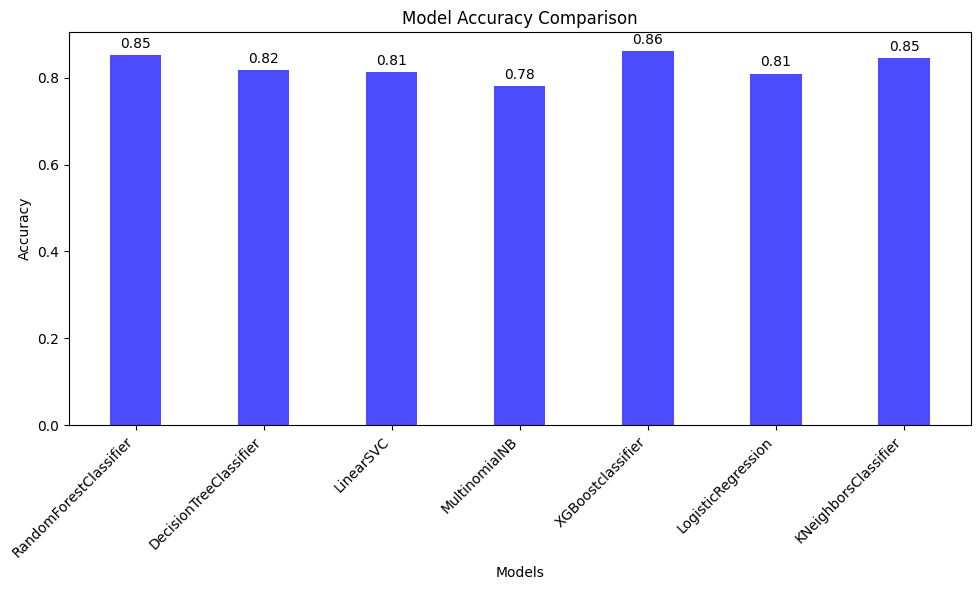

In [51]:

def plot_accuracy(models, accuracies):
    """
    Plot the accuracy of multiple models.

    Parameters:
    - models (list): A list of model names.
    - accuracies (list): A list of accuracy values corresponding to the models.
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate evenly spaced x-coordinates for each model
    x = np.arange(len(models))

    # Plot the accuracy values as bars
    ax.bar(x, accuracies, width=0.4, align='center', alpha=0.7, color='b')

    # Set the x-axis labels to be the model names
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')

    # Set axis labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Model Accuracy Comparison')

    # Display the accuracy values on top of the bars
    for i, acc in enumerate(accuracies):
        ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
models = ['RandomForestClassifier','DecisionTreeClassifier','LinearSVC','MultinomialNB','XGBoostclassifier','LogisticRegression','KNeighborsClassifier']
accuracies = [RandomForestClassifier,DecisionTreeClassifier, LinearSVC,MultinomialNB,XGBoostclassifier,LogisticRegression,KNeighborsClassifier]

plot_accuracy(models, accuracies)


# campare All precision Accuracy Score

In [43]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [44]:
LR_pc= precision_score(y_test,y_pred_lr)
Dt_pc= precision_score(y_test,y_pred_dt)
RF_pc= precision_score(y_test,y_pred_rf)
SVM_pc= precision_score(y_test,y_pred_svm)
NB_pc= precision_score(y_test,y_pred_nb)
KNN_pcr=precision_score(y_test,y_pred_kn)
xgb_pc=precision_score(y_test,y_pred_xgb)

In [45]:
compare_prec=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'precision':[LR_pc,Dt_pc,RF_pc,SVM_pc,NB_pc,KNN_pcr,xgb_pc]})

In [58]:
compare_prec

,Model,precision
0,LR,0.668942
1,Dt,0.618919
2,Rf,0.714499
3,SVM,0.782143
4,NB,0.598870
5,KNN,0.692644
6,XGB,0.792470


In [24]:
model=compare_prec['XGB']

NameError: name 'compare_prec' is not defined

<Axes: xlabel='Model', ylabel='precision'>

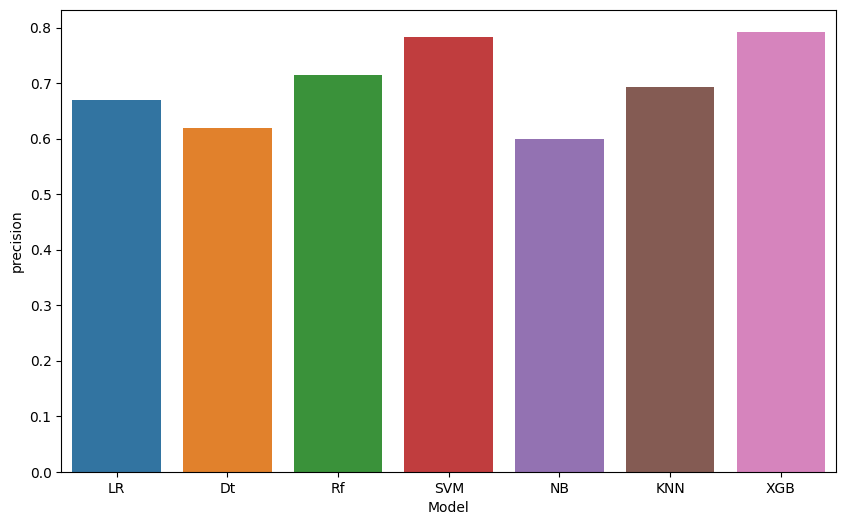

In [59]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
# Equivalent to:
sns.barplot(x = "Model", y = "precision", data = compare_prec)

# campare All Recall Score Accuracy Score

In [60]:
LR_RC= recall_score(y_test,y_pred_lr)
Dt_RC= recall_score(y_test,y_pred_dt)
RF_RC= recall_score(y_test,y_pred_rf)
SVM_RC= recall_score(y_test,y_pred_svm)
NB_RC= recall_score(y_test,y_pred_nb)
KNN_RC=recall_score(y_test,y_pred_kn)
xgb_RC=recall_score(y_test,y_pred_xgb)

In [61]:
compare_Recall=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'recall_score':[LR_RC,Dt_RC,RF_RC,SVM_RC,NB_RC,KNN_RC,xgb_RC]})

In [62]:
compare_Recall

,Model,recall_score
0,LR,0.382563
1,Dt,0.595966
2,Rf,0.621991
3,SVM,0.284971
4,NB,0.206897
5,KNN,0.618738
6,XGB,0.561483


<Axes: xlabel='Model', ylabel='recall_score'>

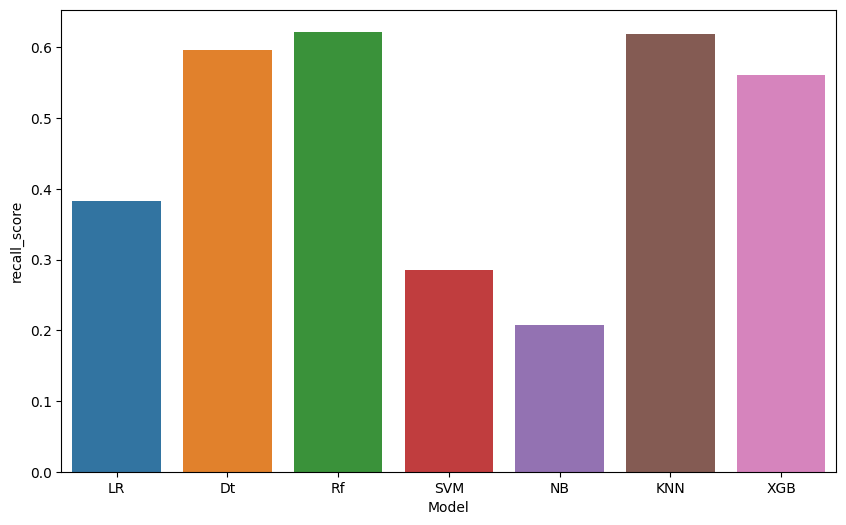

In [63]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
# Equivalent to:
sns.barplot(x = "Model", y = "recall_score", data =compare_Recall )

# campare All F1_score Accuracy Score

In [64]:
LR_f1= f1_score(y_test,y_pred_lr)
Dt_f1= f1_score(y_test,y_pred_dt)
RF_f1= f1_score(y_test,y_pred_rf)
SVM_f1= f1_score(y_test,y_pred_svm)
NB_f1= f1_score(y_test,y_pred_nb)
KNN_f1=f1_score(y_test,y_pred_kn)
xgb_f1=f1_score(y_test,y_pred_xgb)

In [65]:
compare_f1score=pd.DataFrame({'Model':['LR','Dt','Rf','SVM','NB','KNN','XGB'],'recall_score':[LR_f1,Dt_f1,RF_f1,SVM_f1,NB_f1,KNN_f1,xgb_f1]})

In [66]:
compare_f1score

,Model,recall_score
0,LR,0.486755
1,Dt,0.607226
2,Rf,0.665043
3,SVM,0.417740
4,NB,0.307544
5,KNN,0.653608
6,XGB,0.657273


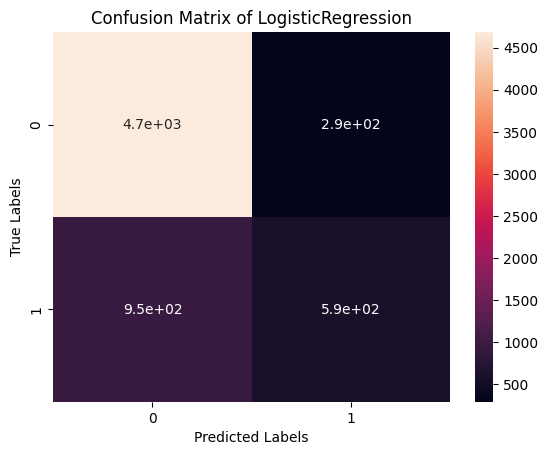

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_pred_lr)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

In [69]:
report_lr = classification_report(y_test, y_pred_lr)
print("Classification report of Logistic Regression (Multi-Class):\n", report_lr)

Classification report of Logistic Regression (Multi-Class):
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4976
           1       0.67      0.38      0.49      1537

    accuracy                           0.81      6513
   macro avg       0.75      0.66      0.68      6513
weighted avg       0.79      0.81      0.79      6513



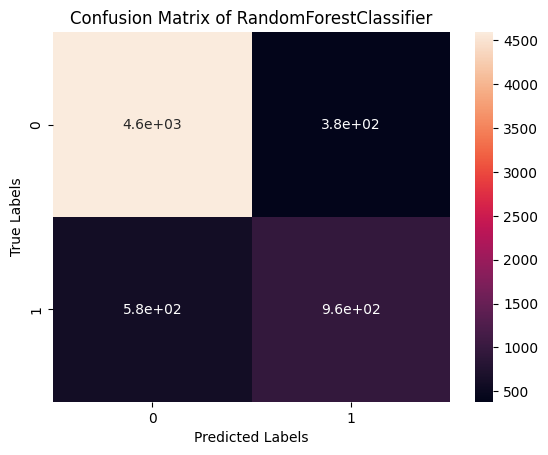

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_pred_rf)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

In [71]:
report_rf = classification_report(y_test,y_pred_rf)
print("Classification report of RandomForestClassifie:\n", report_rf)

Classification report of RandomForestClassifie:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4976
           1       0.71      0.62      0.67      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



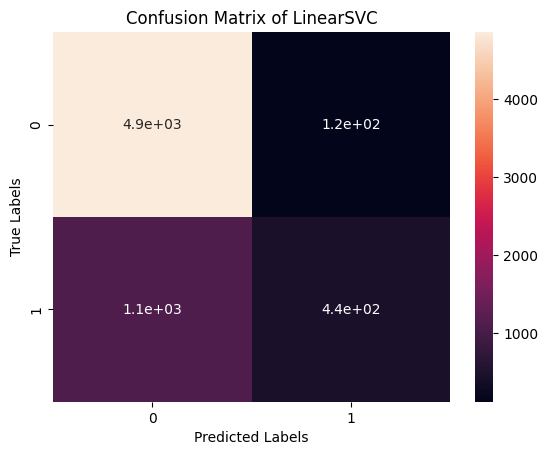

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_pred_svm)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LinearSVC')
plt.show()

In [73]:
report_svm = classification_report(y_test,y_pred_svm)
print("Classification report of LinearSVC:\n", report_svm)

Classification report of LinearSVC:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      4976
           1       0.78      0.28      0.42      1537

    accuracy                           0.81      6513
   macro avg       0.80      0.63      0.65      6513
weighted avg       0.81      0.81      0.78      6513



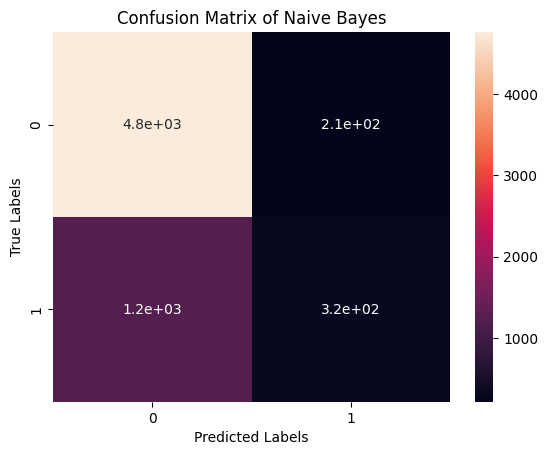

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_pred_nb)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

In [75]:
report_nb= classification_report(y_test,y_pred_nb)
print("Classification report of Naive Bayes:\n", report_nb)

Classification report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      4976
           1       0.60      0.21      0.31      1537

    accuracy                           0.78      6513
   macro avg       0.70      0.58      0.59      6513
weighted avg       0.75      0.78      0.74      6513



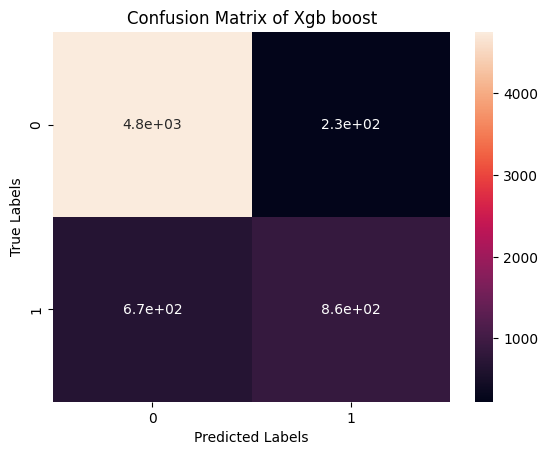

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_pred_xgb)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Xgb boost')
plt.show()

In [13]:
!pip install tpot


#  TPOT Pipeline

In [14]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(
    generations=5,
    population_size=40,
    verbosity=2,
    scoring="accuracy",
    random_state=42
)

tpot.fit(X_train, y_train)




Version 0.12.1 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


Optimization Progress:   0%|          | 0/240 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.863712996367943

Generation 2 - Current best internal CV score: 0.8656324190119786

Generation 3 - Current best internal CV score: 0.8687422661722716

Generation 4 - Current best internal CV score: 0.8687422661722716

Generation 5 - Current best internal CV score: 0.8687422661722716

Best pipeline: XGBClassifier(input_matrix, learning_rate=1.0, max_depth=2, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)


TPOTClassifier(generations=5, population_size=40, random_state=42,
               scoring='accuracy', verbosity=2)

In [15]:
# Results
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test, y_test))

Best pipeline test accuracy: 0.868


In [17]:
import sklearn.metrics
y_predictions = tpot.predict(X_test)
acc= sklearn.metrics.accuracy_score(y_true=y_test,
                                     y_pred=y_predictions)
print("Accuracy:", acc)

Accuracy: 0.8681099339781975


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4976
           1       0.77      0.62      0.69      1537

    accuracy                           0.87      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tpot.predict(X_test)

print('MAE',mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('MSE',mean_squared_error(y_pred=y_pred, y_true=y_test))
print('R2',r2_score(y_pred=y_pred, y_true=y_test))

MAE 0.13189006602180256
MSE 0.13189006602180256
R2 0.2684904457466105


In [58]:
import os
# Change the working directory to a new path
new_directory = "/kaggle/working/"
os.chdir(new_directory)

In [57]:
import xgboost as xgb
# -----------------------
# Train XGBoost Classifier
# -----------------------
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [60]:
# Save model to JSON
# -----------------------
model.save_model("xgb_income_model.json")

print("🎉 Model saved successfully as xgb_income_model.json")

🎉 Model saved successfully as xgb_income_model.json


In [41]:
XGBoostclassifier

0.8618148318747121